Visualizando la distribución de las especies...


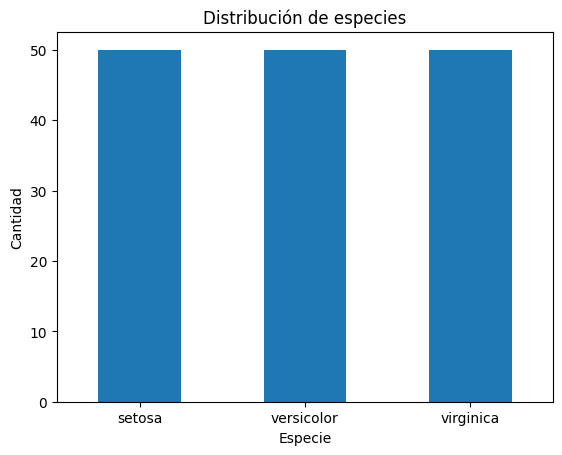


Entrenando y evaluando modelos...
🔹 LogisticRegression accuracy: 1.0000
🔹 DecisionTree accuracy: 1.0000
🔹 XGBoost accuracy: 1.0000

✅ Mejor modelo guardado: LogisticRegression en '../models/trained_model.pkl'


/home/nelson/pipeline-flow-api/prefect-api-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:40:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Iris Notebook: Exploración y Entrenamiento

# --- 1. Importación de Librerías ---
# Se importan todas las herramientas necesarias para el análisis y modelado.
import pandas as pd  # Para la manipulación de datos en formato de tabla (DataFrame).
import matplotlib.pyplot as plt  # Para crear visualizaciones y gráficos.
from sklearn.datasets import load_iris  # Para cargar el conjunto de datos de Iris.
from sklearn.model_selection import train_test_split  # Para dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.metrics import accuracy_score  # Para evaluar la precisión de los modelos.
from sklearn.linear_model import LogisticRegression  # Modelo de Regresión Logística.
from sklearn.tree import DecisionTreeClassifier  # Modelo de Árbol de Decisión.
from xgboost import XGBClassifier  # Modelo XGBoost, un algoritmo de boosting potente.
import pickle  # Para serializar y guardar el modelo entrenado en un archivo.

# --- 2. Carga y Preparación del Dataset ---
# Se carga el dataset de Iris y se convierte a un formato fácil de usar.
iris = load_iris()  # Carga el dataset, que viene en un formato de diccionario.
X, y = iris.data, iris.target  # Separa las características (X) de la variable objetivo (y, la especie).

# Se crea un DataFrame de pandas para una mejor visualización y manipulación.
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y  # Se añade la columna de la especie al DataFrame.

# --- 3. Visualización Básica de los Datos ---
# Se genera un gráfico para entender la distribución de las clases.
print("Visualizando la distribución de las especies...")
df['species'].value_counts().plot(kind='bar', title='Distribución de especies')
plt.xlabel("Especie")
plt.ylabel("Cantidad")
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names, rotation=0) # Asigna nombres a las clases
plt.show() # Muestra el gráfico. Se puede ver que el dataset está balanceado.

# --- 4. División de Datos en Entrenamiento y Prueba ---
# Se separan los datos para entrenar el modelo y luego evaluarlo con datos que no ha visto.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,               # Datos a dividir.
    test_size=0.2,      # Proporción de datos para el conjunto de prueba (20%).
    random_state=42     # Semilla aleatoria para asegurar que la división sea reproducible.
)

# --- 5. Definición y Entrenamiento de Modelos ---
# Se define un diccionario con los modelos que se van a comparar.
models = {
    "LogisticRegression": LogisticRegression(max_iter=200), # max_iter para asegurar convergencia.
    "DecisionTree": DecisionTreeClassifier(max_depth=3), # max_depth para evitar sobreajuste.
    "XGBoost": XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss') # Parámetros comunes para XGBoost.
}
scores = {} # Diccionario para almacenar la precisión (accuracy) de cada modelo.

print("\nEntrenando y evaluando modelos...")
# Se itera sobre cada modelo para entrenarlo y evaluar su rendimiento.
for name, model in models.items():
    # 5.1. Entrenamiento: el modelo "aprende" de los datos de entrenamiento.
    model.fit(X_train, y_train)
    
    # 5.2. Predicción: el modelo predice las especies para el conjunto de prueba.
    preds = model.predict(X_test)
    
    # 5.3. Evaluación: se calcula la precisión comparando las predicciones con los valores reales.
    acc = accuracy_score(y_test, preds)
    scores[name] = acc # Se guarda la puntuación.
    print(f"🔹 {name} accuracy: {acc:.4f}")

# --- 6. Selección y Guardado del Mejor Modelo ---
# Se identifica el modelo con la mayor precisión y se guarda para su uso futuro.
best_model_name = max(scores, key=scores.get) # Obtiene el nombre del modelo con el score más alto.
best_model = models[best_model_name] # Selecciona el objeto del modelo correspondiente.

# Se guarda el mejor modelo en un archivo .pkl usando pickle.
# "wb" significa que se abre el archivo en modo de escritura binaria (write binary).
with open("../models/trained_model.pkl", "wb") as f:
    pickle.dump(best_model, f) 

print(f"\n✅ Mejor modelo guardado: {best_model_name} en '../models/trained_model.pkl'")



In [2]:
!which python
!pip show pandas


/home/nelson/pipeline-flow-api/prefect-api-env/bin/python
Name: pandas
Version: 2.3.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
         
         Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
         All rights reserved.
         
         Copyright (c) 2011-2023, Open source contributors.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the fol